# EXPLANATIONS

<div style="align-items: end; width: 100%; display: flex; flex-direction: row; justify-content: center;">
    <p style="text-align: center; width: 14%;"><b>Input video</b></p>
    <p style="text-align: center; width: 14%;"><b>Video LIME</b></p>
    <p style="text-align: center; width: 14%;"><b>Video Kernel-SHAP</b></p>
    <p style="text-align: center; width: 14%;"><b>Video RISE</b></p>
    <p style="text-align: center; width: 14%;"><b>Vieo LOCO</b></p>
    <p style="text-align: center; width: 14%;"><b>Video UP</b></p>
    <p style="text-align: center; width: 14%;"><b>Video SOS</b></p>
</div>

<div style="width: 100%; display: flex; flex-direction: row; justify-content: center;">
    <img style="width: 14%;" src="../resources/gifs/blowing glass small.gif"/>
    <img style="width: 14%;" src="../resources/gifs/VideoLIME.gif"/>
    <img style="width: 14%;" src="../resources/gifs/VideoKernelSHAP.gif"/>
    <img style="width: 14%;" src="../resources/gifs/VideoRISE.gif"/>
    <img style="width: 14%;" src="../resources/gifs/VideoLOCO.gif"/>
    <img style="width: 14%;" src="../resources/gifs/VideoUP.gif"/>
    <img style="width: 14%;" src="../resources/gifs/VideoSOS.gif"/>
</div>

In [1]:
import os
import numpy as np

from revex_framework.pipelines import ProposedMethods, SeparateSpaceTimeMethods
from revex_framework.xai import Xai, XaiMerge
from revex_framework.utils import resize_video, center_crop_video, load_video, save_video, plot_frames

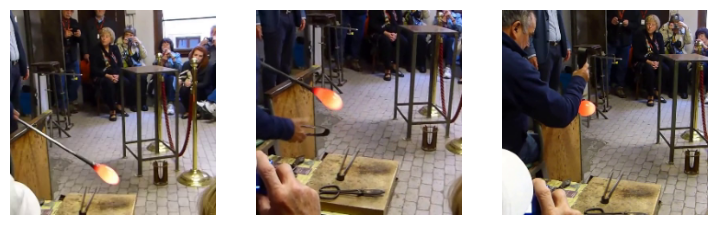

In [7]:
# Load video, rescale and crop
video_path = "../resources/blowing glass.mp4"
video = load_video(video_path)
scale_factor = 224 / min(video.shape[1:3])
video = resize_video(video, scale_factor, scale_factor)
video = center_crop_video(video, 224)

# Temporary save video path
save_path = "../temp"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Show video
plot_frames(video)

def classifier_fn(batch):
    """ Classifier function that returns the predictions for the input batch. 
    
    Args:
        batch (np.array): Batch of videos to predict.

    Returns:
        preds (np.array): Predictions for the input batch.
    """
    preds = [] # Put here your call to the classifier
    return np.array(preds)

## Extended methods

### Video LIME

  0%|          | 0/1001 [00:00<?, ?it/s]

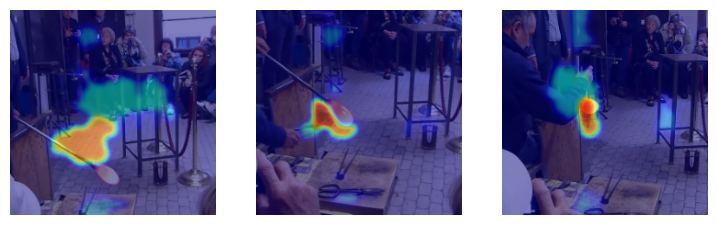

In [13]:
xai = Xai(video, classifier_fn, ProposedMethods.VideoLIME)
xai.run_pipeline()
save_video(xai.exp_vid, save_path, 'VideoLIME.m4v')
plot_frames(xai.exp_vid)

### Video Kernel-SHAP

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

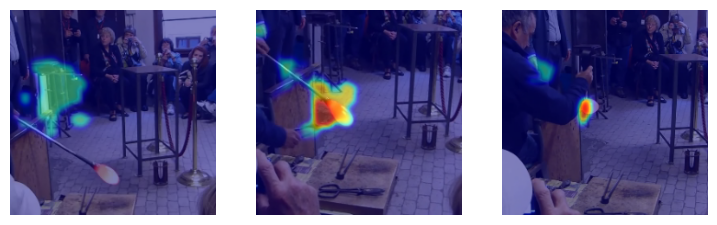

In [33]:
xai = Xai(video, classifier_fn, ProposedMethods.VideoKernelSHAP)
xai.run_pipeline()
save_video(xai.exp_vid, save_path, 'VideoKernelSHAP.m4v')
plot_frames(xai.exp_vid)

### Video RISE

  0%|          | 0/1001 [00:00<?, ?it/s]

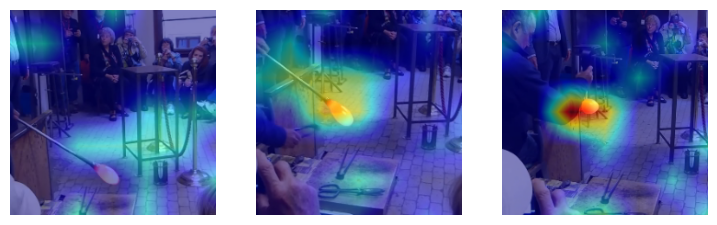

In [17]:
xai = Xai(video, classifier_fn, ProposedMethods.VideoRISE)
xai.run_pipeline()
save_video(xai.exp_vid, save_path, 'VideoRISE.m4v')
plot_frames(xai.exp_vid)

### Video LOCO

  0%|          | 0/137 [00:00<?, ?it/s]

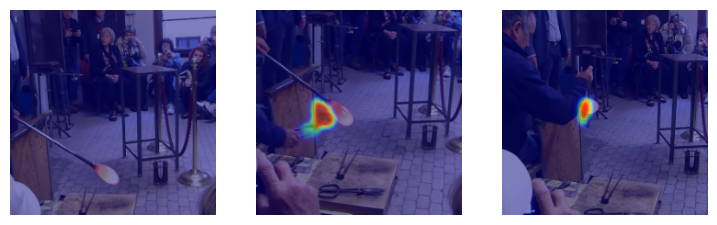

In [18]:
xai = Xai(video, classifier_fn, ProposedMethods.VideoLOCO)
xai.run_pipeline()
save_video(xai.exp_vid, save_path, 'VideoLOCO.m4v')
plot_frames(xai.exp_vid)

### Video UP

  0%|          | 0/137 [00:00<?, ?it/s]

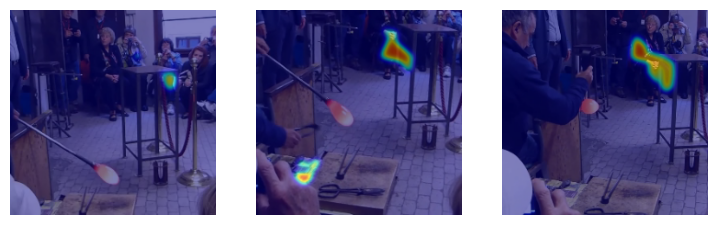

In [19]:
xai = Xai(video, classifier_fn, ProposedMethods.VideoUP)
xai.run_pipeline()
# save_video(xai.exp_vid, save_path, 'VideoUP.m4v')
plot_frames(xai.exp_vid)

### Video SOS

  0%|          | 0/1184 [00:00<?, ?it/s]

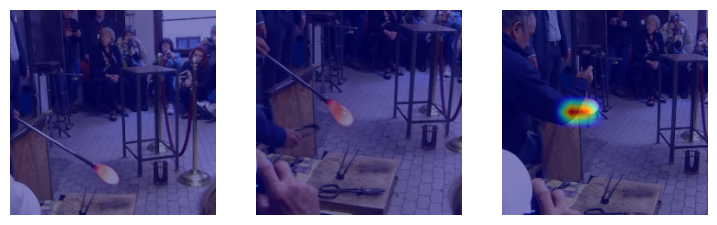

In [21]:
xai = Xai(video, classifier_fn, ProposedMethods.VideoSOS)
xai.run_pipeline()
# save_video(xai.exp_vid, save_path, 'VideoSOS.m4v')
plot_frames(xai.exp_vid)

## Merging different explanations

### Separate space-time explanations

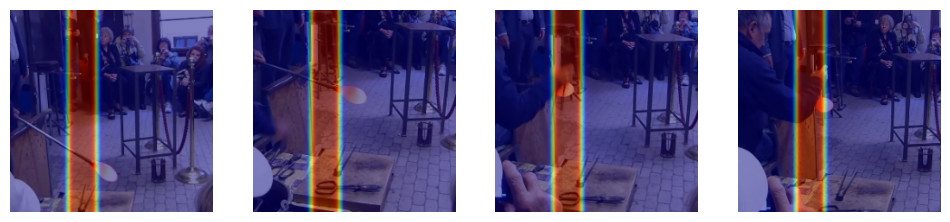

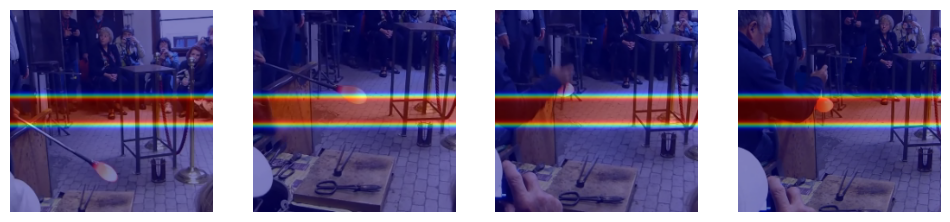

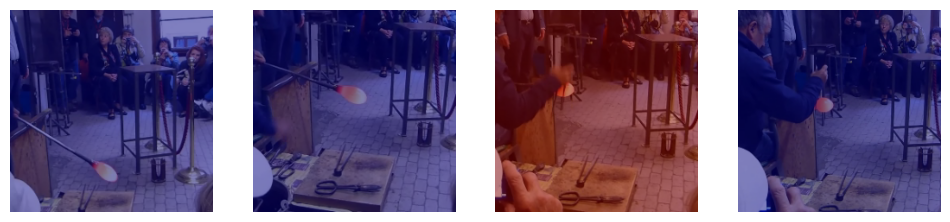

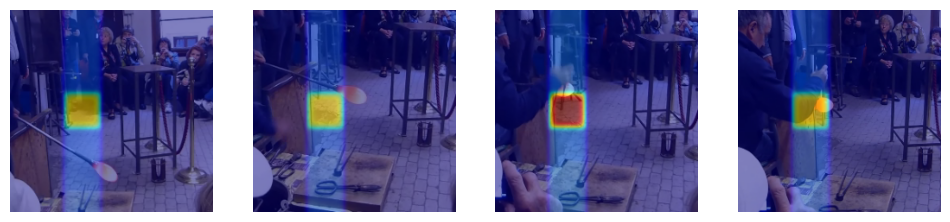

In [31]:
# Run pipelines and merge results
xai = XaiMerge(
    video, 
    classifier_fn, 
    [SeparateSpaceTimeMethods.SpaceX_LIME_blur, SeparateSpaceTimeMethods.SpaceY_LIME_blur, SeparateSpaceTimeMethods.Time_LIME_blur], 
    SeparateSpaceTimeMethods.SpaceX_LIME_blur.vis, 
    show_progress=True)
xai.run_pipeline(verbose=True)
save_video(xai.exp_vid, os.path.join(save_path, 'merged_grid_blur.m4v'))

# Save also partial explanations
for i, x in enumerate(xai.xais):
    x.visualize()
    plot_frames(x.exp_vid, n_frames=4)
plot_frames(xai.exp_vid, n_frames=4)